In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data, encoding="ISO-8859-1")
ride_df = pd.read_csv(ride_data, encoding="ISO-8859-1")

# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, on='city')

# Display the data table for preview
combined_df = combined_df.sort_values('city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


## Bubble Plot of Ride Sharing Data

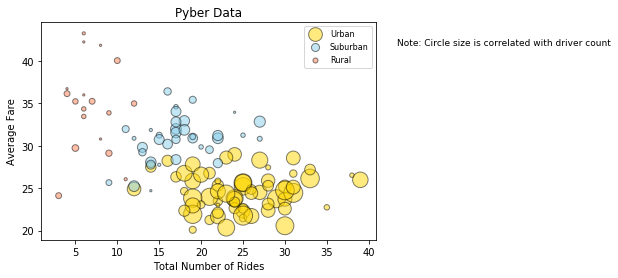

In [3]:
# Create 3 data frames for each city type

urban_df = combined_df.loc[combined_df["type"] == "Urban", :]
suburban_df = combined_df.loc[combined_df["type"] == "Suburban", :]
rural_df = combined_df.loc[combined_df["type"] == "Rural", :]

# group by city
urbancity_df = urban_df.groupby(['city'])
suburbcity_df = suburban_df.groupby(['city'])
ruralcity_df = rural_df.groupby(['city'])

# count number of rides per city
ridecount_urban = urban_df['city'].value_counts().sort_index()
ridecount_rural = rural_df['city'].value_counts().sort_index()
ridecount_suburban = suburban_df['city'].value_counts().sort_index()

# Average ride fare by dividing sum of fare by number of rides per city type
fare_urban = urbancity_df['fare'].sum() / ridecount_urban
fare_suburban = suburbcity_df['fare'].sum() / ridecount_suburban
fare_rural = ruralcity_df['fare'].sum() / ridecount_rural

# Average driver county
drivers_urban = urbancity_df['driver_count'].mean()
driver_suburban = suburbcity_df['driver_count'].mean()
drivers_rural = ruralcity_df['driver_count'].mean()

# Build the scatter plots for each city types
plot_urban = plt.scatter(ridecount_urban, 
                         fare_urban, marker="o", 
                         facecolors="gold", 
                         edgecolors="black",
                         s=drivers_urban*5, 
                         alpha=.5)

plot_suburb = plt.scatter(ridecount_suburban, 
                          fare_suburban, 
                          marker="o", 
                          facecolors="skyblue", 
                          edgecolors="black",
                          s=driver_suburban*5, 
                          alpha=.5)

plot_rural = plt.scatter(ridecount_rural, 
                         fare_rural, 
                         marker="o", 
                         facecolors="coral", 
                         edgecolors="black",
                         s=drivers_rural*5, 
                         alpha=.5)

# Incorporate the other graph properties
plt.title("Pyber Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")

# Create a legend

plt.legend((plot_urban, plot_suburb, plot_rural),
           ('Urban', 'Suburban', 'Rural'),
            loc='upper right',
            fontsize=8)

# Incorporate a text label regarding circle size
plt.text(.95, 0.8, "Note: Circle size is correlated with driver count", fontsize=9, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("PyberScatter.png")
plt.show()

## Total Fares by City Type

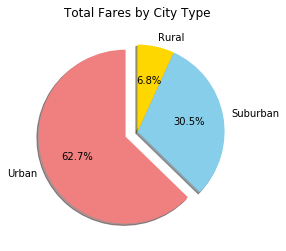

In [9]:
# Calculate Type Percents
fare_urban = urban_df['fare'].sum()
fare_suburban = suburban_df['fare'].sum()
fare_rural = rural_df['fare'].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

sizes = [fare_urban, fare_suburban, fare_rural]

colors = ["lightcoral", "skyblue", "gold"]

explode = (.15,0,0)

plt.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, startangle=90)

plt.title("Total Fares by City Type")

# Save Figure

plt.savefig("TotalFare.png")

plt.show()

## Total Rides by City Type

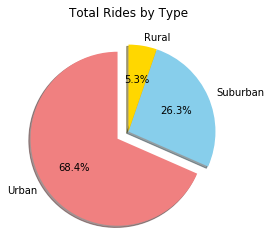

In [8]:
# Calculate Ride Percents
rides_urban = urban_df['city'].count()
rides_suburban = suburban_df['city'].count()
rides_rural = rural_df['city'].count()

# Build Pie Chart
sizes_2 = [rides_urban, rides_suburban, rides_rural]

plt.pie(sizes_2,
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, startangle=90)

plt.title("Total Rides by Type")

# Save Figure
plt.savefig("TotalRidesByType.png")
plt.show()

## Total Drivers by City Type

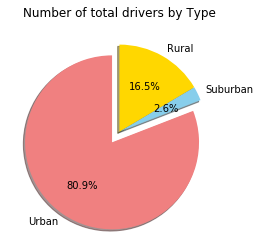

In [7]:
drivers_urban = (urbancity_df['driver_count'].sum() / urbancity_df['city'].count()).sum()
drivers_rural = (ruralcity_df['driver_count'].sum() / ruralcity_df['city'].count()).sum()
drivers_suburban = (suburbcity_df['driver_count'].sum() / suburbcity_df['city'].count()).sum()

# Build Pie Charts
sizes_3 = [drivers_urban, drivers_rural, drivers_suburban]

plt.pie(sizes_3, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%",
        shadow=True, 
        startangle=90)

plt.title("Number of total drivers by Type")

# Save Figure
plt.savefig("Drivers.png")
plt.show()